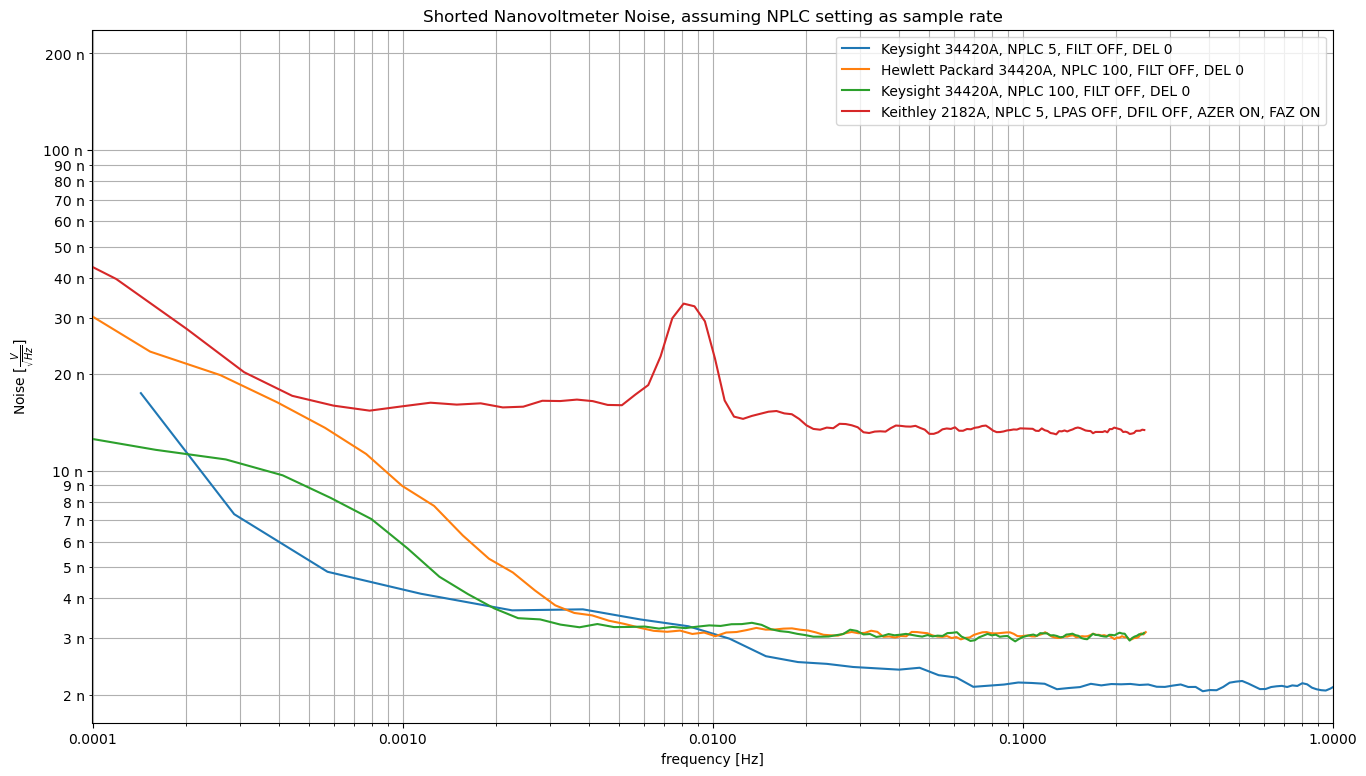

In [34]:
import pandas as pd
from lpsd import lpsd, flattop
import matplotlib.pyplot as plt

# Set up plot
fig,ax = plt.subplots(figsize=(16,9))
plt.loglog()
plt.xlim([0.0001,1])
plt.xlabel('frequency [Hz]')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())
plt.ylabel(r'Noise [$\frac{V}{\sqrt{Hz}}$]')
plt.grid(True, which="both")
plt.title('Shorted Nanovoltmeter Noise, assuming NPLC setting as sample rate')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20241109-204412_Keysight_34420A_short_NPLC5.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=10, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 5, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240319-164251_HP_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Hewlett Packard 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240320-070507_Keysight_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/keithley-2182a/refs/heads/main/20240425-231708_Keithley_2182a_short_NPLC5.csv', header=24, names=['2182a_volt'])
spectrum = lpsd(df['2182a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keithley 2182A, NPLC 5, LPAS OFF, DFIL OFF, AZER ON, FAZ ON')

plt.legend()